<a href="https://colab.research.google.com/github/melirandazzo/trabajo_ciencia_datos/blob/main/Actualizado_actividad_practica_APIs-Melina_Randazzo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Instalar la librería kaggle
!pip install kaggle

# Crear la carpeta .config/kaggle si no existe
!mkdir -p /root/.config/kaggle/

# Descargar el archivo kaggle.json desde GitHub
!wget --no-check-certificate 'https://raw.githubusercontent.com/melirandazzo/trabajo_ciencia_datos/main/Modulo2/kaggle/kaggle.json' -O /root/.config/kaggle/kaggle.json

# Configurar los permisos para el archivo kaggle.json
!chmod 600 /root/.config/kaggle/kaggle.json

# Ver el nombre de los archivos del dataset
import kaggle
!kaggle datasets files ddosad/customer-behaviour-tourism-portal


--2024-08-24 20:23:40--  https://raw.githubusercontent.com/melirandazzo/trabajo_ciencia_datos/main/Modulo2/kaggle/kaggle.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 63 [text/plain]
Saving to: ‘/root/.config/kaggle/kaggle.json’

/root/.config/kaggl 100%[===================>]      63  --.-KB/s    in 0s      

2024-08-24 20:23:40 (4.52 MB/s) - ‘/root/.config/kaggle/kaggle.json’ saved [63/63]

name                             size  creationDate         
------------------------------  -----  -------------------  
Customer behaviour Tourism.csv  820KB  2023-11-13 15:17:10  


In [2]:
#Instalar libreria missingo
!pip install missingno

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import missingno as msno
import pandas as pd

import zipfile
import os

In [4]:
# Descargar el dataset desde Kaggle
!kaggle datasets download -d ddosad/customer-behaviour-tourism-portal

# Descomprimir el archivo descargado
dataset_zip = "customer-behaviour-tourism-portal.zip"
with zipfile.ZipFile(dataset_zip, 'r') as zip_ref:
    zip_ref.extractall(".")

# Cargar el archivo CSV en un DataFrame de pandas
df = pd.read_csv("Customer behaviour Tourism.csv")
print(df.head())

Dataset URL: https://www.kaggle.com/datasets/ddosad/customer-behaviour-tourism-portal
License(s): other
  0% 0.00/235k [00:00<?, ?B/s]
100% 235k/235k [00:00<00:00, 67.4MB/s]
    UserID Taken_product  Yearly_avg_view_on_travel_page preferred_device  \
0  1000001           Yes                           307.0  iOS and Android   
1  1000002            No                           367.0              iOS   
2  1000003           Yes                           277.0  iOS and Android   
3  1000004            No                           247.0              iOS   
4  1000005            No                           202.0  iOS and Android   

   total_likes_on_outstation_checkin_given yearly_avg_Outstation_checkins  \
0                                  38570.0                              1   
1                                   9765.0                              1   
2                                  48055.0                              1   
3                                  48720.0             

Dataset reference: https://www.kaggle.com/datasets/ddosad/customer-behaviour-tourism-portal

# Columnas:
**UserID**:	Unique ID of the user

**Taken_product**: Whether the customer buy the ticket or not

**Yearly_avg_view_on_travel_page**:	Average yearly views on any travel-related page by the user

**preferred_device**:	Preferred device for user login

**total_likes_on_outstation_checkin_given**:	Total number of likes given by the user on out-of-station check-ins in the last year

**yearly_avg_Outstation_checkins**:	Average number of out-of-station check-ins done by the user

**member_in_family**:	Total number of relationships mentioned by the user in the account

**preferred_location_type**:	Preferred type of location for traveling by the user

**Yearly_avg_comment_on_travel_page**:	Average yearly comments on any travel-related page by the user

**total_likes_on_outofstation_checkin_received**:	Total number of likes received by the user on out-of-station check-ins in the last year

**week_since_last_outstation_checkin**:	Number of weeks since the last out-of-station check-in update by the user

**following_company_page**:	Whether the customer is following the company page (Yes or No)

**montly_avg_comment_on_company_page**:	Average monthly comments on the company page by the user

**working_flag**:	Whether the customer is working or not

**travelling_network_rating**:	The rating indicating if the user has close friends who also like traveling. 1 is high, 4 is lowest

**Adult_flag**:	Whether the customer is an adult or not

**Daily_Avg_mins_spend_on_traveling_page**:	Average time spent on the company's travel page by the user

In [5]:
# Ver la lista de columnas y tipo de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11760 entries, 0 to 11759
Data columns (total 17 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   UserID                                        11760 non-null  int64  
 1   Taken_product                                 11760 non-null  object 
 2   Yearly_avg_view_on_travel_page                11179 non-null  float64
 3   preferred_device                              11707 non-null  object 
 4   total_likes_on_outstation_checkin_given       11379 non-null  float64
 5   yearly_avg_Outstation_checkins                11685 non-null  object 
 6   member_in_family                              11760 non-null  object 
 7   preferred_location_type                       11729 non-null  object 
 8   Yearly_avg_comment_on_travel_page             11554 non-null  float64
 9   total_likes_on_outofstation_checkin_received  11760 non-null 

In [6]:
df.describe().round(1)

,UserID,Yearly_avg_view_on_travel_page,total_likes_on_outstation_checkin_given,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,montly_avg_comment_on_company_page,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
count,11760.0,11179.0,11379.0,11554.0,11760.0,11760.0,11760.0,11760.0,11759.0,11759.0
mean,1005880.5,280.8,28170.5,74.8,6531.7,3.2,28.7,2.7,0.8,13.8
std,3395.0,68.2,14385.0,24.0,4706.6,2.6,48.7,1.1,0.9,9.1
min,1000001.0,35.0,3570.0,3.0,1009.0,0.0,4.0,1.0,0.0,0.0
25%,1002940.8,232.0,16380.0,57.0,2940.8,1.0,17.0,2.0,0.0,8.0
50%,1005880.5,271.0,28076.0,75.0,4948.0,3.0,22.0,3.0,1.0,12.0
75%,1008820.2,324.0,40525.0,92.0,8393.2,5.0,27.0,4.0,1.0,18.0
max,1011760.0,464.0,252430.0,815.0,20065.0,11.0,500.0,10.0,3.0,270.0


In [7]:
# Valores únicos para la columna yearly_avg_Outstation_checkins
print(df['yearly_avg_Outstation_checkins'].unique())

['1' '24' '23' '27' '16' '15' '26' '19' '21' '11' '10' '25' '12' '18' '29'
 nan '22' '14' '20' '28' '17' '13' '*' '5' '8' '2' '3' '9' '7' '6' '4']


In [8]:
#Reemplazar * en la columna yearly_avg_Outstation_checkins por 0
df['yearly_avg_Outstation_checkins'] = df['yearly_avg_Outstation_checkins'].replace('*', 0)
# Convertir la columna 'yearly_avg_Outstation_checkins' a tipo float64
df['yearly_avg_Outstation_checkins'] = df['yearly_avg_Outstation_checkins'].astype('float64')

In [9]:
#Setear columnas categoricas con tipo de dato category
df["Taken_product"]= df["Taken_product"].astype("category")
df["preferred_device"]= df["preferred_device"].astype("category")
df["member_in_family"]=df["member_in_family"].astype("category")
df["preferred_location_type"]=df["preferred_location_type"].astype("category")
df["following_company_page"]=df["following_company_page"].astype("category")
df["working_flag"]=df["working_flag"].astype("category")
df.describe(include="category")

,Taken_product,preferred_device,member_in_family,preferred_location_type,following_company_page,working_flag
count,11760,11707,11760,11729,11657,11760
unique,2,10,7,15,5,3
top,No,Tab,3,Beach,No,No
freq,9864,4172,4561,2424,8355,9951


In [10]:
# Valores únicos para la columna 'Adult_flag'
print(df['Adult_flag'].unique())

# Valores únicos para la columna 'member_in_family'
print(df['member_in_family'].unique())


[ 0.  1.  3.  2. nan]
['2', '1', '4', 'Three', '3', '5', '10']
Categories (7, object): ['1', '10', '2', '3', '4', '5', 'Three']


In [11]:
# Basado en la información adquirida en Keaggle
# Reemplazar valores distintos a 0 de la columna Adult_flag por 1
df['Adult_flag'] = df['Adult_flag'].replace([2,3,4,5], 1)
df['Adult_flag'] = df['Adult_flag'].fillna(0)
df['Adult_flag'] = df['Adult_flag'].astype('int64')

In [12]:
# Reemplazar 'Three' por 3 en la columna 'member_in_family'
df['member_in_family'] = df['member_in_family'].replace('Three', 3)

# Convertir la columna 'member_in_family' a int64
df['member_in_family'] = df['member_in_family'].astype('int64')


In [13]:
#Ver valores distintos para las columnas following_company_page,	working_flag
print("Valores distintos para following_company_page:", df['following_company_page'].unique())
print("Valores distintos para working_flag:", df['working_flag'].unique())


Valores distintos para following_company_page: ['Yes', 'No', 'Yeso', NaN, '1', '0']
Categories (5, object): ['0', '1', 'No', 'Yes', 'Yeso']
Valores distintos para working_flag: ['No', 'Yes', '0']
Categories (3, object): ['0', 'No', 'Yes']


In [14]:
df["following_company_page"]=df["following_company_page"].astype("object")
# Reemplazar valores en la columna 'following_company_page'
df['following_company_page'] = df['following_company_page'].replace(['Yeso', '1'], 'Yes')
df['following_company_page'] = df['following_company_page'].fillna('No')
df['following_company_page'] = df['following_company_page'].replace('0', 'No')

# Verificar los valores únicos después de la limpieza
print("Valores distintos para following_company_page después de la limpieza:", df['following_company_page'].unique())


Valores distintos para following_company_page después de la limpieza: ['Yes' 'No']


In [15]:
# Reemplazar el valor '0' en la columna working_flag por No
df['working_flag'] = df['working_flag'].replace('0', 'No')


In [16]:
#Reemplazar "No" con 0 y "Yes" con 1 en las columnas especificadas
df['Taken_product'] = df['Taken_product'].replace({'No': 0, 'Yes': 1})
df['following_company_page'] = df['following_company_page'].replace({'No': 0, 'Yes': 1})
df['working_flag'] = df['working_flag'].replace({'No': 0, 'Yes': 1})


In [17]:
#Cambiar el tipo de datos de las columnas a 'int64'
df['Taken_product'] = df['Taken_product'].astype('int64')
df['following_company_page'] = df['following_company_page'].astype('int64')
df['working_flag'] = df['working_flag'].astype('int64')


In [77]:
# Verificar los valores únicos en la columna 'preferred_device'
print(df['preferred_device'].unique())

['Mobile', 'iOS', 'Android', 'Tab', 'Other', 'Laptop']
Categories (6, object): ['Android', 'Laptop', 'Mobile', 'Other', 'Tab', 'iOS']


In [76]:
# Reemplazar 'Others' por 'Other' en la columna 'preferred_device'
df['preferred_device'] = df['preferred_device'].replace('Others', 'Other')

# Reemplazar 'ANDROID' por 'Android' en la columna 'preferred_device'
df['preferred_device'] = df['preferred_device'].replace('ANDROID', 'Android')

# Reemplazar 'Android OS' por 'Android' en la columna 'preferred_device'
df['preferred_device'] = df['preferred_device'].replace('Android OS', 'Android')

# Reemplazar 'iOS and Android' por 'Android' en la columna 'preferred_device'
df['preferred_device'] = df['preferred_device'].replace('iOS and Android', 'Mobile')

In [81]:
# Obtener los valores únicos de la columna 'preferred_location_type'
unique_values = df['preferred_location_type'].unique()

# Convertir los valores únicos a una lista y mostrarlos
unique_values_list = list(unique_values)
print(unique_values_list)

['Financial', 'Other', 'Medical', nan, 'Game', 'Social media', 'Entertainment', 'Tour and Travel', 'Movie', 'OTT', 'Tour  Travel', 'Beach', 'Historical site', 'Big Cities', 'Trekking', 'Hill Stations']


In [82]:
# Reemplazar 'Tour  Travel' por 'Tour and Travel' en la columna 'preferred_location_type'
df['preferred_location_type'] = df['preferred_location_type'].replace('Tour  Travel', 'Tour and Travel')

In [83]:
# Contar valores de la columna preferred_location_type con valos nan

df['preferred_location_type'].isna().sum()


31

In [84]:
# pReemplazar valores nan por Other en la columna preferred_location_type

df['preferred_location_type'] = df['preferred_location_type'].fillna('Other')


<Axes: >

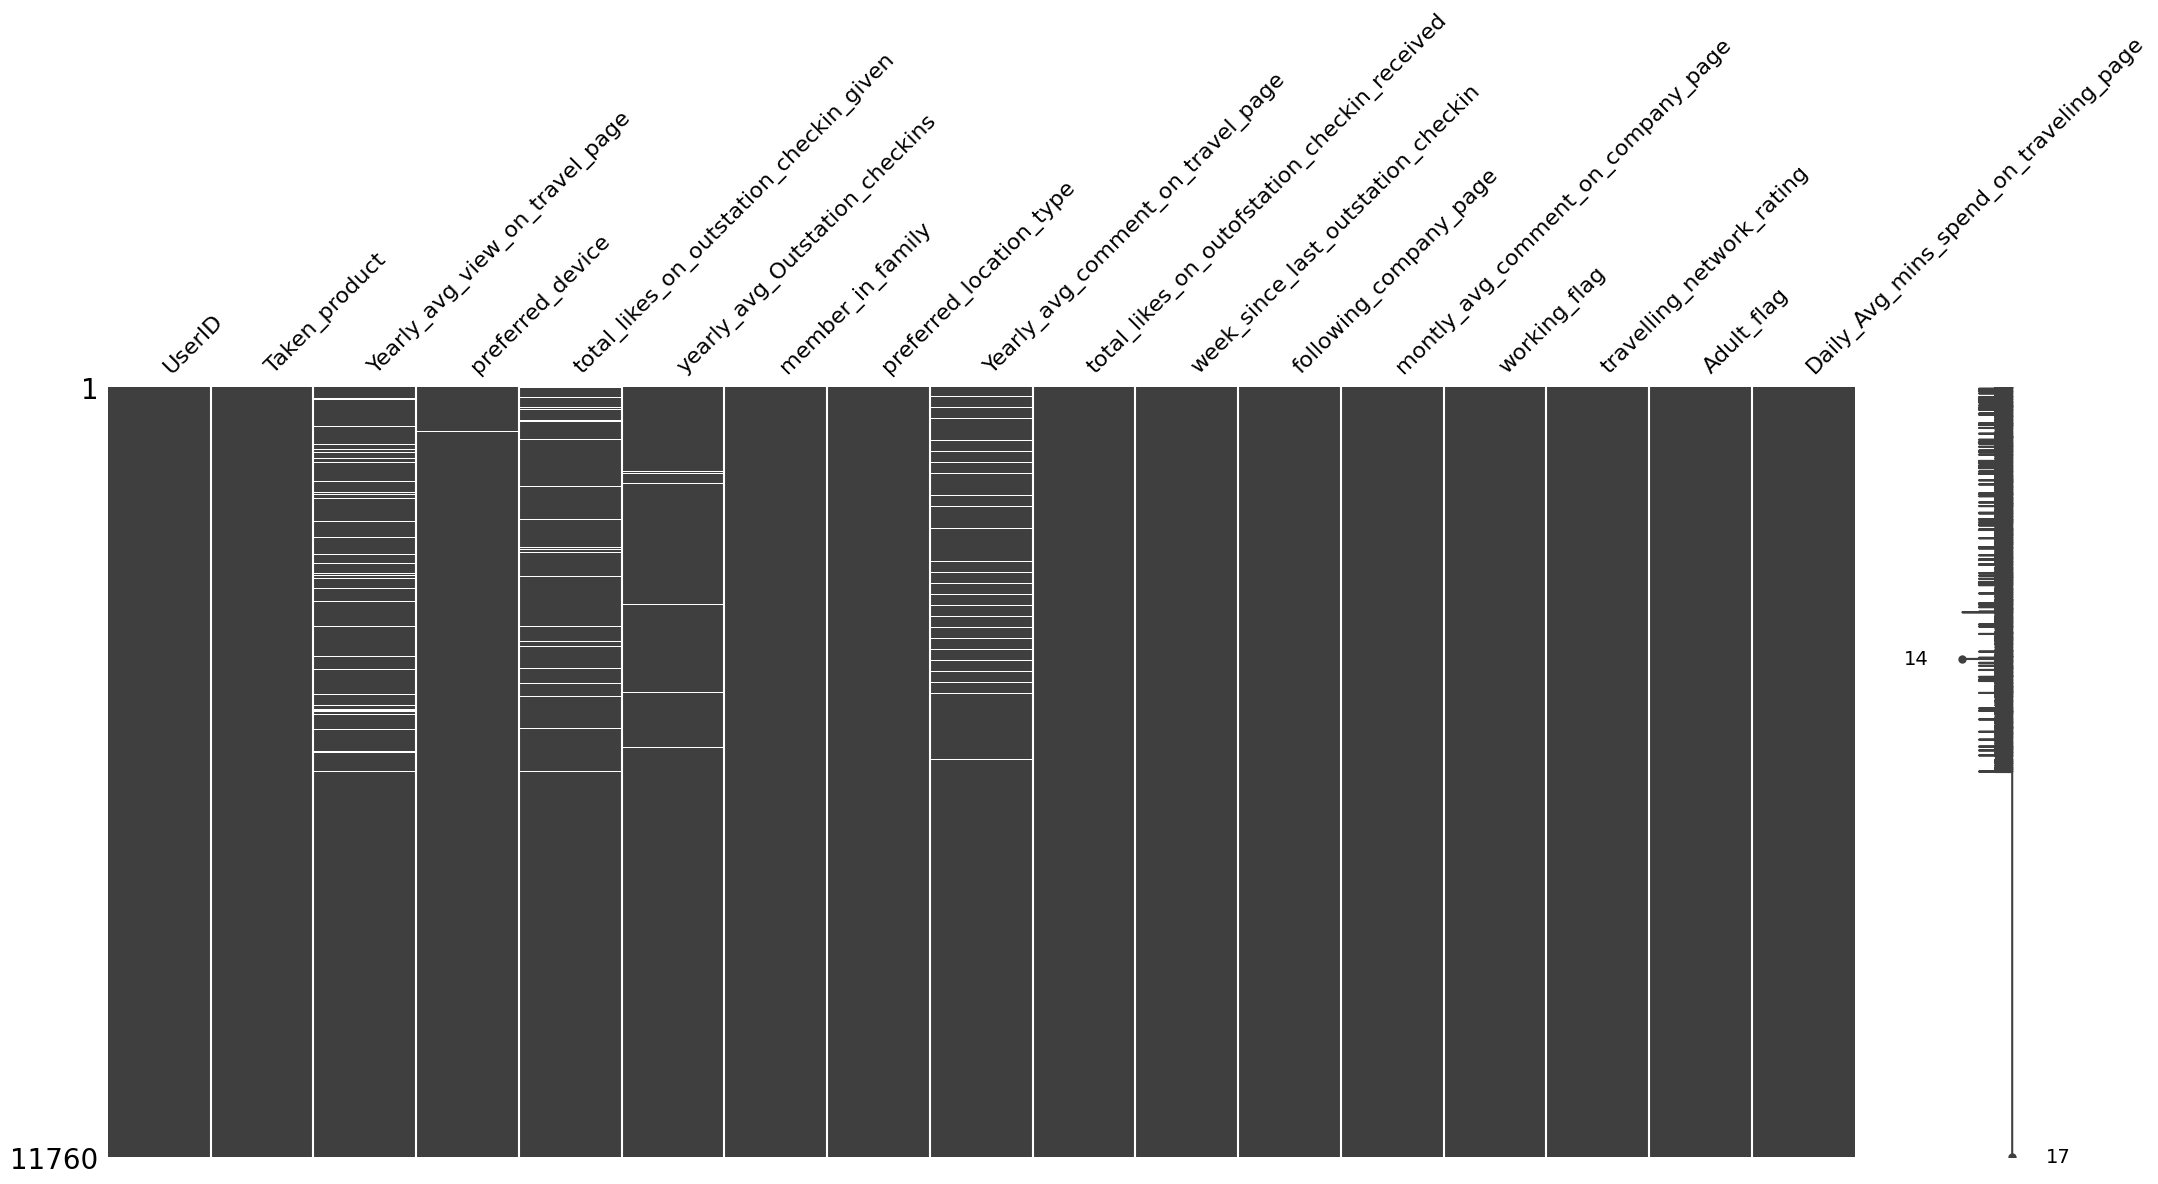

In [18]:
#Evaluar si hay valores nulos
msno.matrix(df)

Se detecta solo un valor nulo para la columna "preferred_device" por lo que se decide completarla con el valor moda "Tab".

Los nulos de las columnas "Yearly_avg_view_on_travel_page", "total_likes_on_outstation_checkin_given", "yearly_avg_Outstation_checkins", "Yearly_avg_comment_on_travel_page" dado que son valores de cantidad de interacciones del usuario con los sitios se decide reemplazar los nulos por 0.



In [19]:
#Reemplazar los nulos de la columna preferred_device por Tab
df['preferred_device'] = df['preferred_device'].fillna('Tab')

In [20]:
#Reemplazar los nulos de las columnas "Yearly_avg_view_on_travel_page", "total_likes_on_outstation_checkin_given", "yearly_avg_Outstation_checkins", "Yearly_avg_comment_on_travel_page" por 0
df['Yearly_avg_view_on_travel_page'] = df['Yearly_avg_view_on_travel_page'].fillna(0)
df['total_likes_on_outstation_checkin_given'] = df['total_likes_on_outstation_checkin_given'].fillna(0)
df['yearly_avg_Outstation_checkins'] = df['yearly_avg_Outstation_checkins'].fillna(0)
df['Yearly_avg_comment_on_travel_page'] = df['Yearly_avg_comment_on_travel_page'].fillna(0)


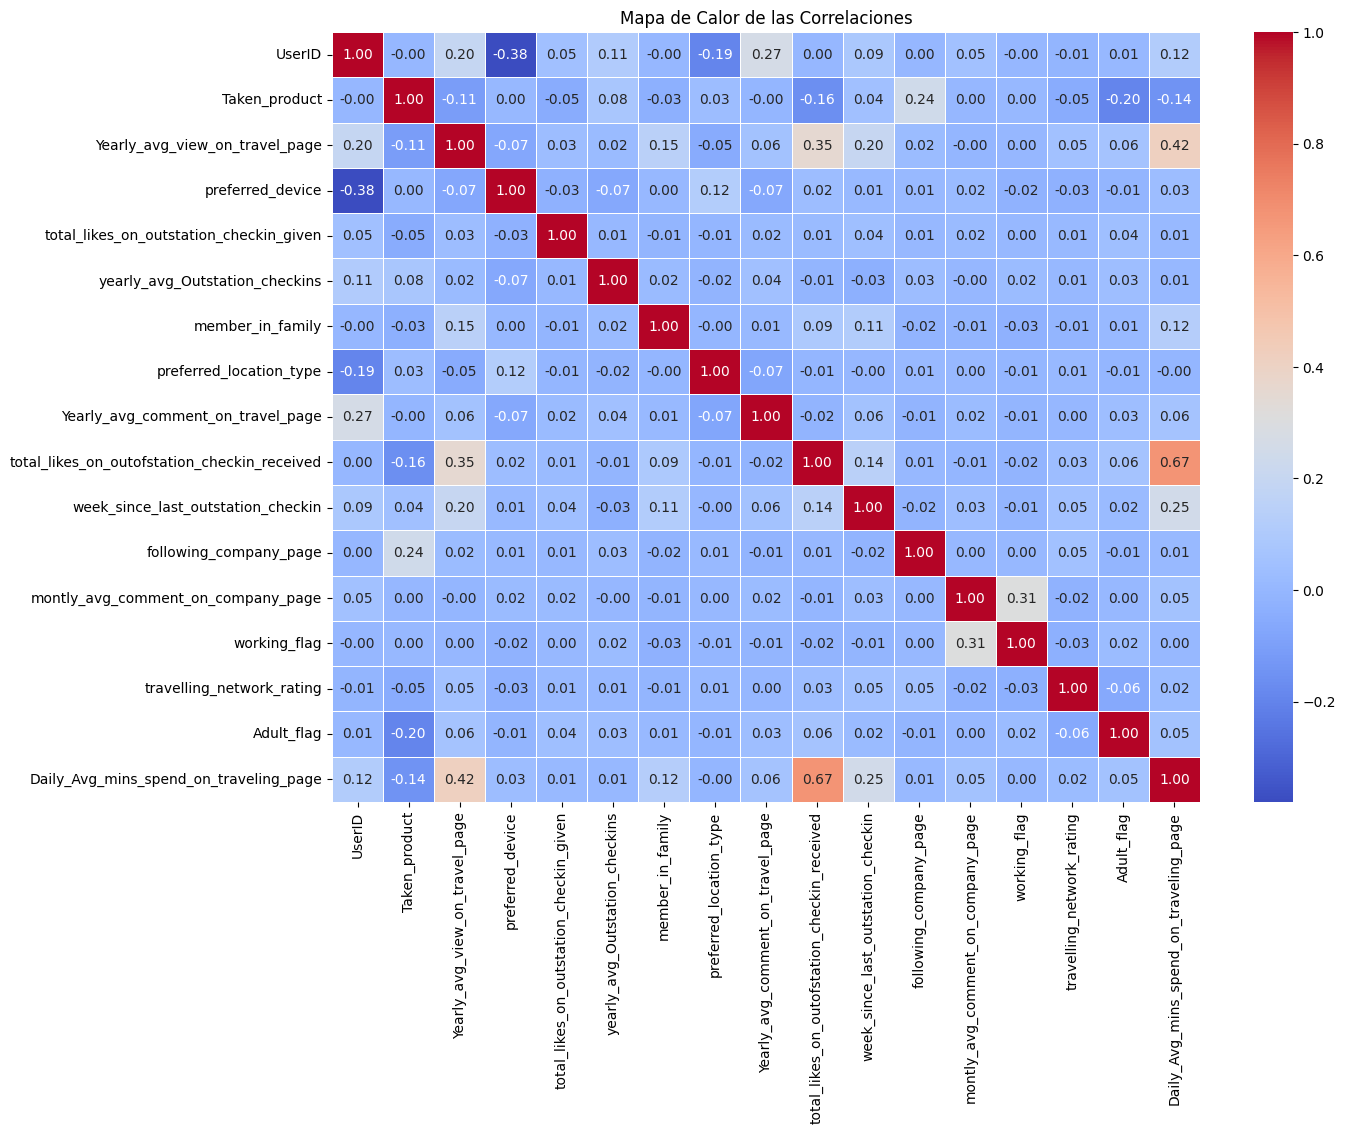

In [26]:
# Crear un objeto LabelEncoder
le = LabelEncoder()
df_selected = df.copy()

# Codificar las columnas categóricas seleccionadas
categorical_columns = ['preferred_device', 'preferred_location_type', 'working_flag', 'Adult_flag', 'Taken_product', 'following_company_page']

for col in categorical_columns:
    df_selected[col] = le.fit_transform(df_selected[col])

# Calcular la matriz de correlación
correlation_matrix = df_selected.corr()

# Visualizar el heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Mapa de Calor de las Correlaciones')
plt.show()

A partir del mapa de calor se observa una correlacion lineal positiva ente las personas que siguen el sitio web y efectivamente comprar el producto.
Tambien existe una correlacion entre la cantidad de miembros en la familia y el tiempo visitando sitios de viaje. Asi como tambien el tiempo visitando el sitio web muestra una correlación con la compra del producto.
Existe una correlacion entre los dispositivos utilizados y la locación preferida, pero esta correlación no resulta significativa para el analisis.

Ninguna de las variables presenta una correlación fuerte entre si, pero se puede ver el tiempo visitando los sitios, seguir el sitio web, la cantidad de miembros en la familia y la edad representan variables utiles para el analisis sobre turismo de este dataset.

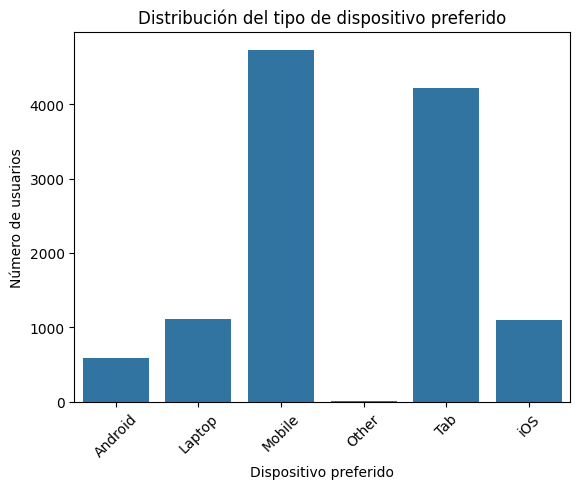

In [78]:
sns.countplot(x='preferred_device', data=df)
plt.title('Distribución del tipo de dispositivo preferido')
plt.xlabel('Dispositivo preferido')
plt.ylabel('Número de usuarios')
plt.xticks(rotation=45)
plt.show()

Los dispositivos preferidos para realizar busqueda de viajes son tablets y celuares tanto android como iphone.

Los usuarios que trabajan son quienes más comentarios dejan en los sitios sobre los lugares de viajes.

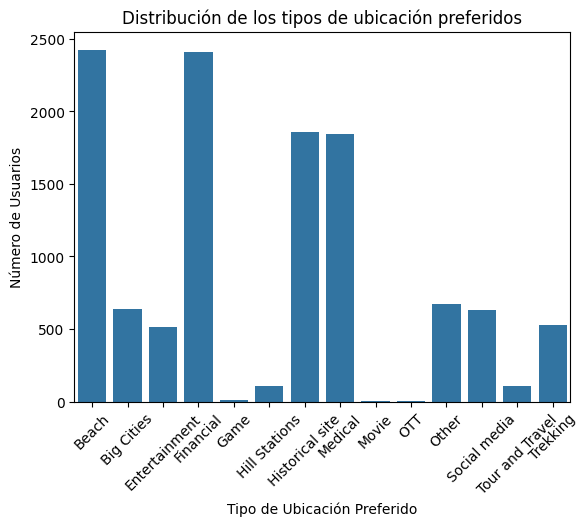

In [85]:
sns.countplot(x='preferred_location_type', data=df)
plt.title('Distribución de los tipos de ubicación preferidos')
plt.xlabel('Tipo de Ubicación Preferido')
plt.ylabel('Número de Usuarios')
plt.xticks(rotation=45)
plt.show()

Los lugares más requeridos para viajar es la playa y lugares de entretenimiento. Seguido por montañas y lugares históricos.

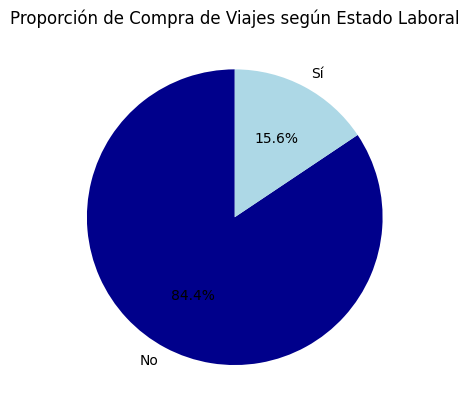

In [55]:
# Crear una copia de los valores de 'working_flag' solo para el gráfico
working_purchase = df[df['Taken_product'] == 1]['working_flag'].replace({0: 'No', 1: 'Sí'}).value_counts()

# Graficar la proporción de compra de viajes según el estado laboral con colores personalizados
working_purchase.plot.pie(autopct='%1.1f%%', startangle=90, colors=['darkblue', 'lightblue'])

plt.title('Proporción de Compra de Viajes según Estado Laboral')
plt.ylabel('')  # Eliminar la etiqueta del eje Y para el gráfico de torta
plt.show()



El gráfico de torta indica que los clientes que no cuentan con empleo formal tienen una mayor tendencia a adquirir viajes en comparación con aquellos que se encuentran en situación de empleo activo.

<ipython-input-129-b9919bec24eb>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  prop = df.groupby('preferred_device')['Taken_product'].value_counts(normalize=True).unstack()


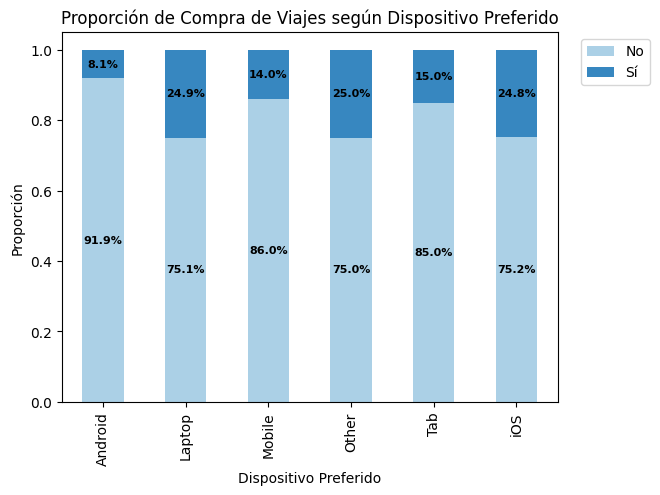

In [129]:
# Reemplazar los valores 0 y 1 por 'No' y 'Sí' para la leyenda, sin cambiar los datos originales
prop = df.groupby('preferred_device')['Taken_product'].value_counts(normalize=True).unstack()
prop.columns = ['No', 'Sí']

# Crear el gráfico de barras apiladas con tonos de azul
ax = prop.plot(kind='bar', stacked=True, color=sns.color_palette('Blues', len(prop.columns)))

# Agregar los valores porcentuales a cada barra
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Evitar colocar texto en alturas de 0
        ax.text(p.get_x() + p.get_width() / 2, p.get_y() + height / 2, f'{height:.1%}',
                ha='center', va='center', color='black', fontsize=8, weight='bold')

# Ajustar el título y las etiquetas
plt.title('Proporción de Compra de Viajes según Dispositivo Preferido')
plt.xlabel('Dispositivo Preferido')
plt.ylabel('Proporción')

# Mover la leyenda fuera del gráfico, en la esquina superior derecha
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1), title='')

plt.show()


El gráfico de proporciones muestra que los mayores porcentajes de compras de viajes se registran a través de computadoras, dispositivos iOS, y en la categoría de "Otros", que abarca medios no digitales.

<ipython-input-91-60616ff2bd67>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df['Taken_product'] == 1]['travelling_network_rating'], label='Compra', shade=True, color='blue')
<ipython-input-91-60616ff2bd67>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df['Taken_product'] == 0]['travelling_network_rating'], label='No Compra', shade=True, color='red')


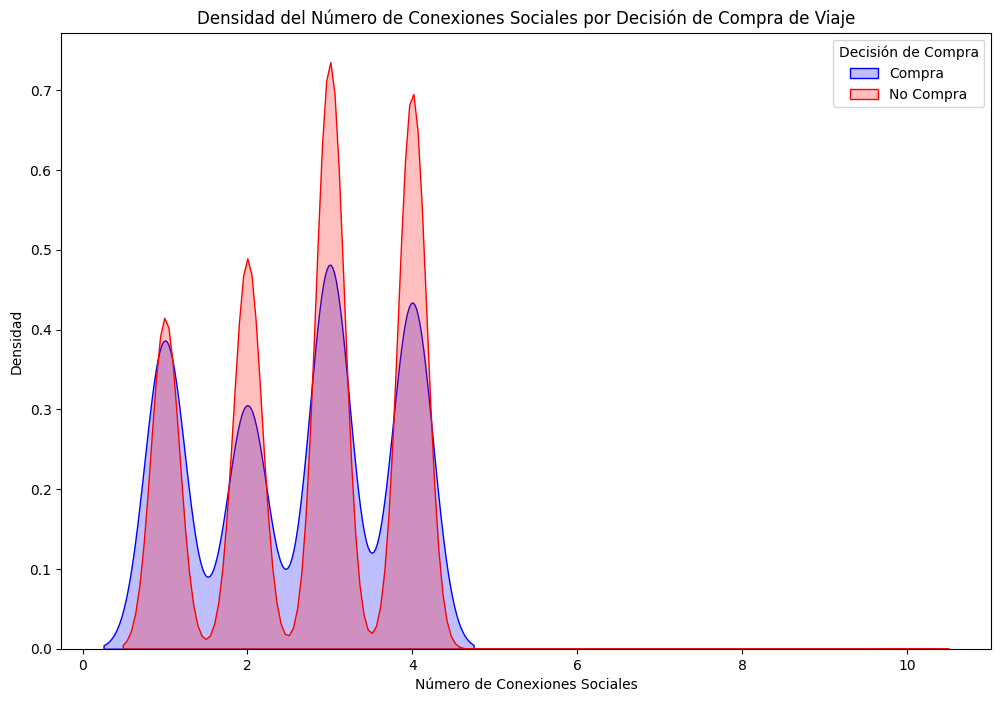

In [91]:
# Crear un gráfico de densidad
plt.figure(figsize=(12, 8))
sns.kdeplot(data=df[df['Taken_product'] == 1]['travelling_network_rating'], label='Compra', shade=True, color='blue')
sns.kdeplot(data=df[df['Taken_product'] == 0]['travelling_network_rating'], label='No Compra', shade=True, color='red')

# Ajustar el título y las etiquetas
plt.title('Densidad del Número de Conexiones Sociales por Decisión de Compra de Viaje')
plt.xlabel('Número de Conexiones Sociales')
plt.ylabel('Densidad')

# Mostrar la leyenda y el gráfico
plt.legend(title='Decisión de Compra')
plt.show()


El gráfico de densidad revela que las conexiones sociales relacionadas con los viajeros presentan una cierta relación con la decisión de compra de viajes. Sin embargo, esta relación no parece ser un factor determinante en la decisión de compra.

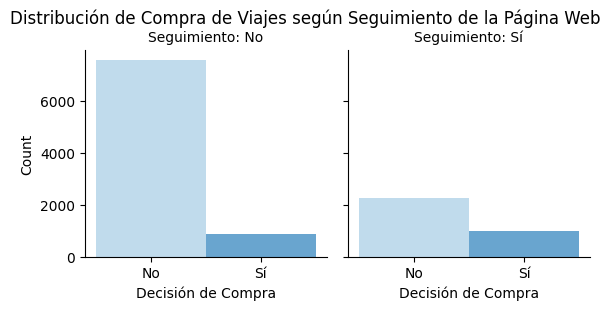

In [106]:
# Crear FacetGrid
g = sns.FacetGrid(df, col='following_company_page', hue='Taken_product', col_wrap=2, palette='Blues')

# Mapa de histogramas con configuración personalizada
g.map(sns.histplot, 'Taken_product', discrete=True, multiple='stack', binwidth=0.5, edgecolor=None)

# Ajustar los títulos, etiquetas del eje y el tamaño de la fuente
for ax in g.axes.flat:
    # Convertir los valores en 'following_company_page' a 'Sí' y 'No'
    col_name = ax.get_title().split(' = ')[-1]
    if col_name == '1':
        col_label = 'Sí'
    elif col_name == '0':
        col_label = 'No'
    else:
        col_label = col_name

    # Ajustar etiquetas del eje x
    ax.set_xlabel('Decisión de Compra', fontsize=10)  # Cambiar la etiqueta del eje x
    ax.set_xticks([0, 1])
    ax.set_xticklabels(['No', 'Sí'])

    # Ajustar etiquetas del título del gráfico con un tamaño de fuente más pequeño
    ax.set_title(f'Seguimiento: {col_label}', fontsize=10)

# Ajustar título general y agregar la leyenda en el margen superior derecho
plt.suptitle('Distribución de Compra de Viajes según Seguimiento de la Página Web', y=1.02)

plt.show()


El gráfico de gráfico de comparación de distribuciones evidencia que la suscripción al sitio web no asegura la compra de viajes. Asimismo, se observa una cantidad significativamente mayor de personas que visitan las páginas web sin suscribirse ni seguir el sitio.

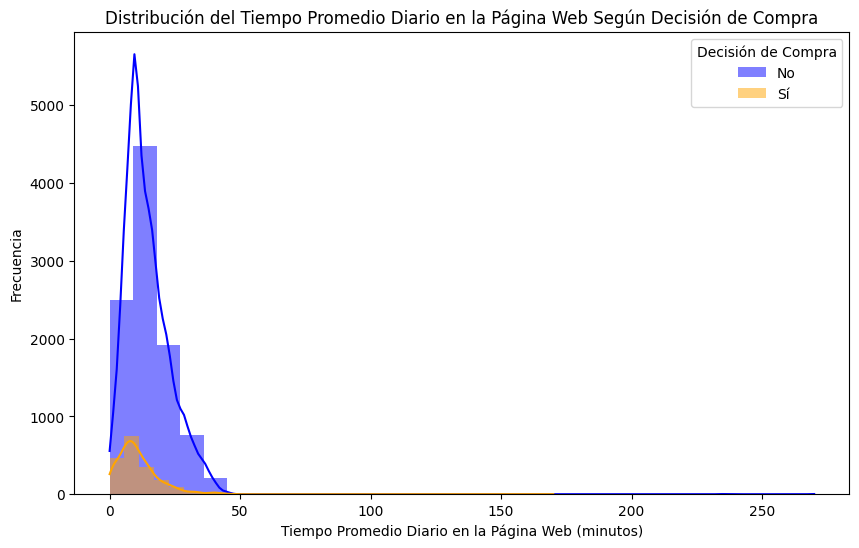

In [133]:
plt.figure(figsize=(10, 6))

# Crear histogramas superpuestos
sns.histplot(df[df['Taken_product'] == 0]['Daily_Avg_mins_spend_on_traveling_page'], color='blue', label='No', kde=True, bins=30)
sns.histplot(df[df['Taken_product'] == 1]['Daily_Avg_mins_spend_on_traveling_page'], color='orange', label='Sí', kde=True, bins=30)

# Ajustar títulos y etiquetas
plt.title('Distribución del Tiempo Promedio Diario en la Página Web Según Decisión de Compra')
plt.xlabel('Tiempo Promedio Diario en la Página Web (minutos)')
plt.ylabel('Frecuencia')
plt.legend(title='Decisión de Compra')
plt.show()


El histograma revela que los individuos que pasan más tiempo en el sitio web tienden a realizar menos compras, mientras que aquellos que navegan por menos tiempo tienen una mayor propensión a efectuar una compra. Esto sugiere una posible decisión de compra previa entre los usuarios que navegan menos.

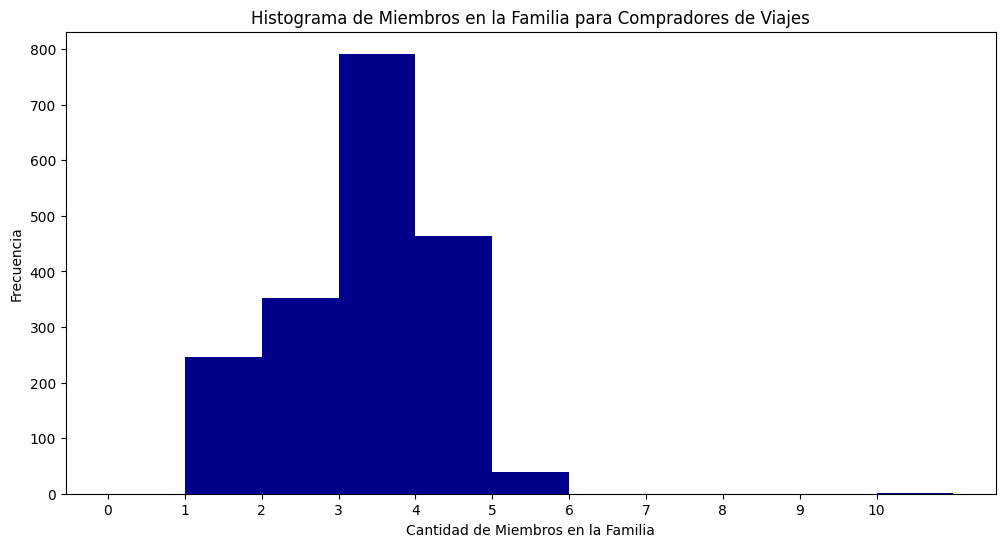

In [135]:
plt.figure(figsize=(12, 6))

# Crear el histograma
plt.hist(df_buyers['member_in_family'], bins=range(int(df_buyers['member_in_family'].max()) + 2), color='darkblue', edgecolor=None)

# Ajustar títulos y etiquetas
plt.title('Histograma de Miembros en la Familia para Compradores de Viajes')
plt.xlabel('Cantidad de Miembros en la Familia')
plt.ylabel('Frecuencia')
plt.xticks(range(int(df_buyers['member_in_family'].max()) + 1))
plt.show()


El histograma muestra que, entre los compradores de viajes, la mayoría proviene de familias con entre 3 y 5 integrantes.

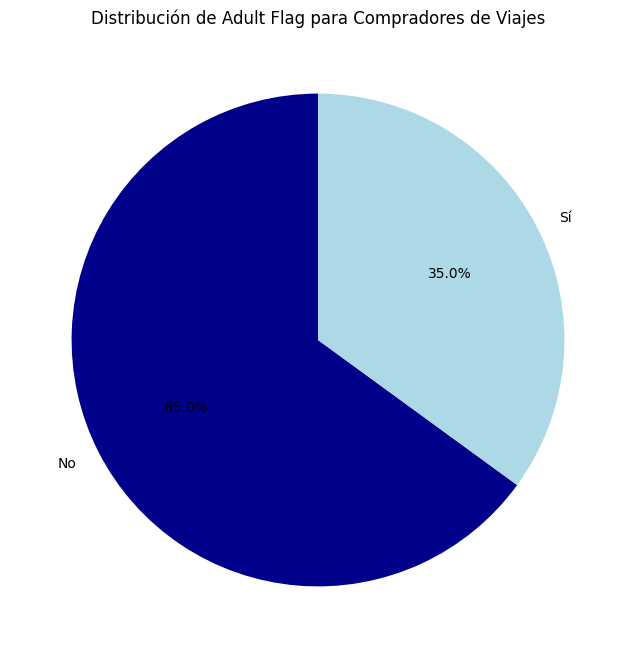

In [143]:
plt.figure(figsize=(8, 8))

# Datos para gráfico de pastel
prop = df[df['Taken_product'] == 1]['Adult_flag'].value_counts()
prop.plot.pie(autopct='%1.1f%%', colors=['darkblue', 'lightblue'], labels=['No', 'Sí'], startangle=90)

# Ajustar título
plt.title('Distribución de Adult Flag para Compradores de Viajes')
plt.ylabel('')
plt.show()


De los datos obtenidos, se observa que la mayoría de los usuarios menores de edad son los que realizan la mayoría de las compras.